In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [161]:
from rpy2.robjects.packages import importr
from rpy2 import robjects
C50 = importr('C50')    
C5_0 = robjects.r('C5.0')

In [162]:
df = pd.read_csv('dados.csv', sep = ';', encoding = "ISO-8859-1")

In [163]:
df.head()

,IDFluxo,Status,Matriculas,Ingresso,IDDisciplina,IDEstudante
0,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,2,2011/1,CIC0007,27990
1,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2011/1,ENM0068,27990
2,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2011/1,ENM0071,27990
3,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2011/1,FGA0008,27990
4,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,2,2011/1,FGA0009,27990


In [164]:
df_fluxos = pd.read_csv('fluxos.csv', sep = ';', encoding = "ISO-8859-1")

In [165]:
df_fluxos.head()

,Abrev,IDFluxo,Periodo,Natureza,IDDisciplina
0,AEROESPACIAL,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,Obrigatória,FGA0161
1,AEROESPACIAL,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,Obrigatória,FGA0162
2,AEROESPACIAL,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,Obrigatória,FGA0168
3,AEROESPACIAL,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,Obrigatória,MAT0024
4,AEROESPACIAL,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,Obrigatória,MAT0030


In [166]:
df.dtypes

IDFluxo         object
Status           int64
Matriculas       int64
Ingresso        object
IDDisciplina    object
IDEstudante      int64
dtype: object

In [167]:
df_fluxos.dtypes

Abrev           object
IDFluxo         object
Periodo          int64
Natureza        object
IDDisciplina    object
dtype: object

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92932 entries, 0 to 92931
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IDFluxo       92932 non-null  object
 1   Status        92932 non-null  int64 
 2   Matriculas    92932 non-null  int64 
 3   Ingresso      92867 non-null  object
 4   IDDisciplina  92932 non-null  object
 5   IDEstudante   92932 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 4.3+ MB


In [169]:
df_fluxos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3403 entries, 0 to 3402
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Abrev         3403 non-null   object
 1   IDFluxo       3403 non-null   object
 2   Periodo       3403 non-null   int64 
 3   Natureza      3403 non-null   object
 4   IDDisciplina  3403 non-null   object
dtypes: int64(1), object(4)
memory usage: 133.1+ KB


In [170]:
elements,counts = np.unique(df['IDFluxo'],return_counts = True)
entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
entropy

3.128726812249089

In [171]:
anosAntigos = ["2009/2", "2010/2", "2011/1", "2011/2"]
df_anosAntigos = df[df.Ingresso.isin(anosAntigos)]
df_anosAntigos.head()

,IDFluxo,Status,Matriculas,Ingresso,IDDisciplina,IDEstudante
0,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,2,2011/1,CIC0007,27990
1,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2011/1,ENM0068,27990
2,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2011/1,ENM0071,27990
3,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2011/1,FGA0008,27990
4,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,2,2011/1,FGA0009,27990


In [172]:
anoDoze = ["2012/1", "2012/2"]
df_anoDoze = df[df.Ingresso.isin(anoDoze)]
df_anoDoze.head()

,IDFluxo,Status,Matriculas,Ingresso,IDDisciplina,IDEstudante
121,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2012/1,CIC0007,27760
122,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2012/1,ENM0068,27760
123,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2012/1,ENM0071,27760
124,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2012/1,ENM0080,27760
125,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2012/1,FGA0008,27760


In [173]:
anoTreze = ["2013/1", "2013/2"]
df_anoTreze = df[df.Ingresso.isin(anoTreze)]
df_anoTreze.head()

,IDFluxo,Status,Matriculas,Ingresso,IDDisciplina,IDEstudante
944,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,2,2013/1,CIC0007,27238
945,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2013/1,ENE0277,27238
946,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,4,2013/1,ENM0068,27238
947,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2013/1,ENM0071,27238
948,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2013/1,ENM0080,27238


In [174]:
anoQuatorze = ["2014/1", "2014/2"]
df_anoQuatorze = df[df.Ingresso.isin(anoQuatorze)]
df_anoQuatorze.head()

,IDFluxo,Status,Matriculas,Ingresso,IDDisciplina,IDEstudante
1881,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2014/1,CIC0088,26253
1882,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2014/1,ENE0277,26253
1883,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,3,2014/1,ENM0068,26253
1884,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2014/1,ENM0071,26253
1885,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,2,2014/1,ENM0080,26253


In [175]:
anoQuinze = ["2015/1", "2015/2"]
df_anoQuinze = df[df.Ingresso.isin(anoQuinze)]
df_anoQuinze.head()

,IDFluxo,Status,Matriculas,Ingresso,IDDisciplina,IDEstudante
2999,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2015/1,CIC0007,24071
3000,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2015/1,CIC0088,24071
3001,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2015/1,ENM0068,24071
3002,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2015/1,ENM0071,24071
3003,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2015/1,ENM0080,24071


In [176]:
anoDezesseis = ["2016/1", "2016/2"]
df_anoDezesseis = df[df.Ingresso.isin(anoDezesseis)]
df_anoDezesseis.head()

,IDFluxo,Status,Matriculas,Ingresso,IDDisciplina,IDEstudante
5724,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2016/1,DEG0204,18484
5725,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2016/1,ENM0068,18484
5726,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2016/1,ENM0071,18484
5727,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2016/1,ENM0080,18484
5728,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2016/1,FGA0008,18484


In [177]:
anoDezessete = ["2017/1", "2017/2"]
df_anoDezessete = df[df.Ingresso.isin(anoDezessete)]
df_anoDezessete.head()

,IDFluxo,Status,Matriculas,Ingresso,IDDisciplina,IDEstudante
7953,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2017/1,ENM0080,14162
7954,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2017/1,FGA0009,14162
7955,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2017/1,FGA0011,14162
7956,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2017/1,FGA0021,14162
7957,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,1,2017/1,FGA0039,14162


In [178]:
anoDezoito = ["2018/1", "2018/2"]
df_anoDezoito = df[df.Ingresso.isin(anoDezoito)]
df_anoDezoito.head()

,IDFluxo,Status,Matriculas,Ingresso,IDDisciplina,IDEstudante
10580,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,2,2018/1,ADM0023,5338
10581,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,2,2018/1,CIC0004,5338
10582,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,1,2018/1,FGA0090,5338
10583,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,1,2018/1,FGA0133,5338
10584,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,1,2018/1,FGA0148,5338


In [179]:
anoDezenove = ["2019/1", "2019/2"]
df_anoDezenove = df[df.Ingresso.isin(anoDezenove)]
df_anoDezenove.head()

,IDFluxo,Status,Matriculas,Ingresso,IDDisciplina,IDEstudante
13136,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,2,2019/1,CIC0004,4684
13137,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,4,2019/1,FGA0133,4684
13138,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,1,2019/1,FGA0148,4684
13139,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,1,2019/1,FGA0154,4684
13140,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,2,2019/1,FGA0157,4684


In [180]:
anoVinte = ["2020/1", "2020/2"]
df_anoVinte = df[df.Ingresso.isin(anoVinte)]
df_anoVinte.head()

,IDFluxo,Status,Matriculas,Ingresso,IDDisciplina,IDEstudante
15026,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,5,1,2020/1,FGA0021,11007
15027,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,5,1,2020/1,FGA0037,11007
15028,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,5,1,2020/1,FGA0038,11007
15029,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,5,1,2020/1,FGA0039,11007
15030,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,5,1,2020/1,FGA0043,11007


In [181]:
anoVinteUm = ["2021/1", "2021/2"]
df_anoVinteUm = df[df.Ingresso.isin(anoVinteUm)]
df_anoVinteUm.head()

,IDFluxo,Status,Matriculas,Ingresso,IDDisciplina,IDEstudante
15042,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,1,2021/1,CIC0004,22317
15043,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,1,2021/1,FGA0133,22317
15044,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,1,2021/1,FGA0157,22317
15045,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,1,2021/1,FGA0161,22317
15046,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,1,2021/1,FGA0163,22317


In [182]:
X_anosAntigos = df_anosAntigos.drop(['Status', 'IDDisciplina', 'Ingresso'], axis=1).copy()
X_anosAntigos.head()

,IDFluxo,Matriculas,IDEstudante
0,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,27990
1,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,27990
2,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,27990
3,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,1,27990
4,ENGENHARIA AEROESPACIAL/FGA - Bacharel - Prese...,2,27990


In [183]:
X_encoded = pd.get_dummies(X_anosAntigos, columns=['IDFluxo'])
X_encoded.head()

,Matriculas,IDEstudante,IDFluxo_ENGENHARIA AEROESPACIAL/FGA - Bacharel - Presencial - D - 20121,IDFluxo_ENGENHARIA AUTOMOTIVA/FGA - Bacharel - Presencial - D - 20082,IDFluxo_ENGENHARIA DE ENERGIA/FGA - Bacharel - Presencial - D - 20082,IDFluxo_ENGENHARIA DE SOFTWARE/FGA - Bacharel - Presencial - D - 20082,IDFluxo_ENGENHARIA ELETRÔNICA/FGA - Bacharel - Presencial - D - 20082,IDFluxo_ENGENHARIA ELETRÔNICA/FGA - Bacharel - Presencial - D - 20152
0,2,27990,1,0,0,0,0,0
1,1,27990,1,0,0,0,0,0
2,1,27990,1,0,0,0,0,0
3,1,27990,1,0,0,0,0,0
4,2,27990,1,0,0,0,0,0


In [184]:
y = df_anosAntigos['Status'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

In [185]:
X_anosAntigos.dtypes

IDFluxo        object
Matriculas      int64
IDEstudante     int64
dtype: object

In [186]:
y.unique()

array([1, 2, 5], dtype=int64)

In [187]:
len(X_encoded)

980

In [188]:
len(y)

980

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

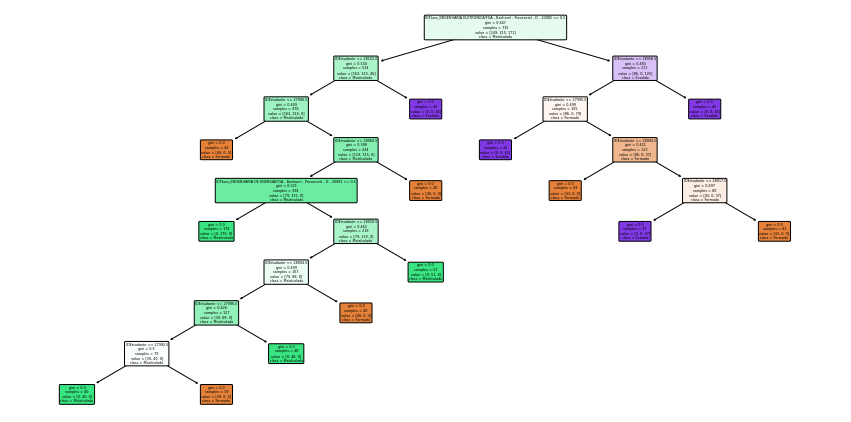

In [190]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled=True, rounded=True,
        class_names=["Formado", "Matrículado", "Evadido"],
        feature_names=X_encoded.columns);

C:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


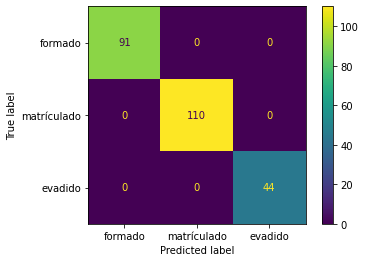

In [191]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels =["formado", "matrículado", "evadido"])

In [192]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

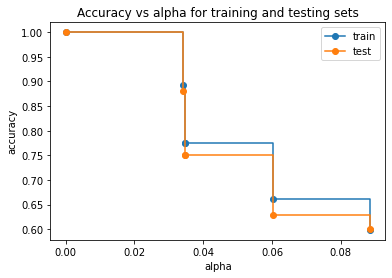

In [193]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label ="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

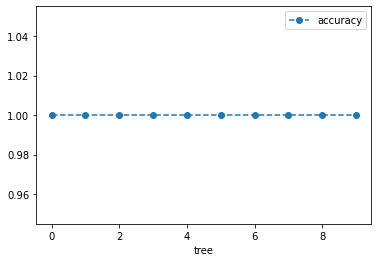

In [194]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.004)
scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

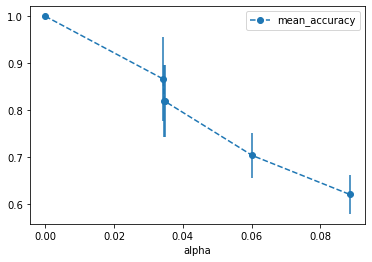

In [195]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                    y='mean_accuracy',
                    yerr='std',
                    marker='o',
                    linestyle='--')

In [196]:
alpha_results[(alpha_results['alpha'] >0.03)
& (alpha_results['alpha'] < 0.04)]

,alpha,mean_accuracy,std
1,0.034266,0.866383,0.089087
2,0.034658,0.818771,0.076747
3,0.034798,0.818771,0.076747


In [197]:
ideal_ccp_alpha = 0.034266

ideal_ccp_alpha

0.034266

In [198]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.034266

In [199]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                        ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) 

C:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


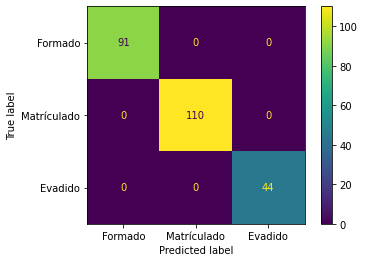

In [200]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=["Formado", "Matrículado", "Evadido"])

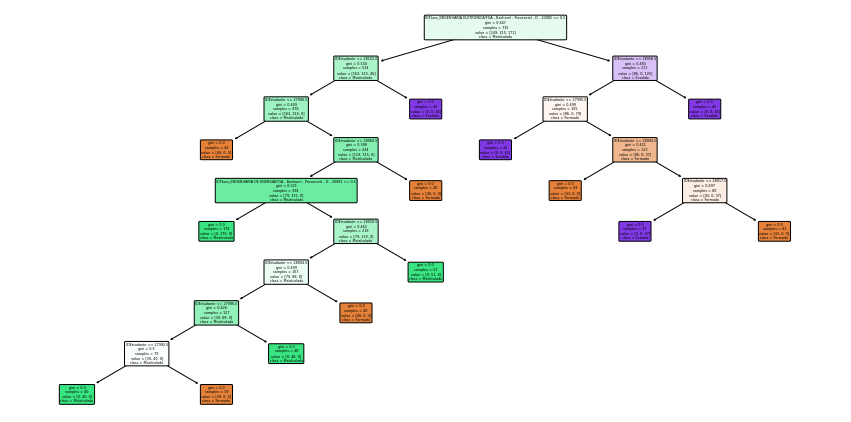

In [201]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, filled=True, rounded=True, class_names=["Formado", "Matrículado", "Evadido"], feature_names=X_encoded.columns);

In [202]:
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        91
           2       0.62      1.00      0.77       110
           5       0.54      0.84      0.65        44

    accuracy                           0.60       245
   macro avg       0.39      0.61      0.47       245
weighted avg       0.38      0.60      0.46       245



C:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,